<a href="https://colab.research.google.com/github/alexc6h6/Regression-Model/blob/master/_Linear_Regression(L1%2C_L2_Regularizer%2C_Cross_Validation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Model

Regression model which is a supervised machine learning used to predict a target value(y, output) based on features(x, input). The target is a continue value. 

The model is mostly used for price prediction and forecast. Regression techniques mostly differ based on the number of independent variables and the type of relationship between the independent and dependent variables.


y = wx + b


![alt text](https://miro.medium.com/max/1000/1*QiU6DcP_r9qWLznMw0-M_Q.png)



In [0]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


Take Boston house price as example:


In [0]:
data = datasets.load_boston()

features = data.data
label = data.target

In [0]:
data = pd.DataFrame(features)
data['Price'] = pd.DataFrame(label)

data.rename(columns = {0:'CRIM', 1:'ZN', 2:'INDUS', 3:'CHAS', 4:'NOX', 5:'RM', 6:'AGE', 7:'DIS', 8:'RAD', 9:'TAX',
                       10:'PTRATIO', 11:'B', 12:'LSTAT'}, inplace = True)

Price is the label(y, output). Others are features(x, input)

In [4]:
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]


The relationship between the price and room numbers(RM). There is a positive correlation with room numbers and house price.


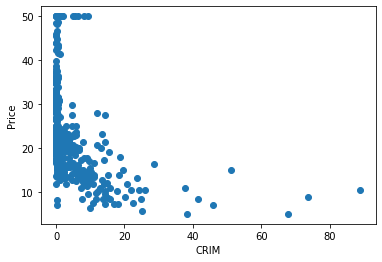

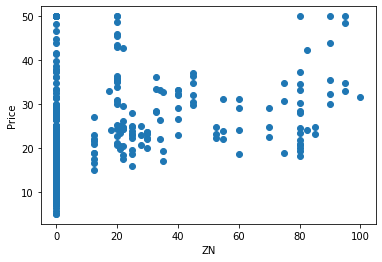

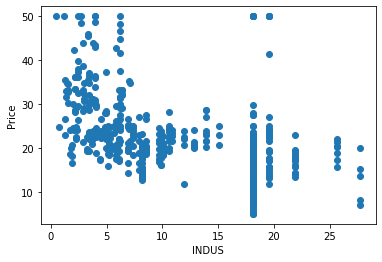

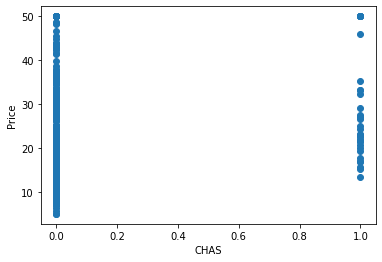

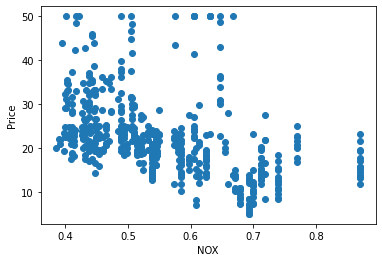

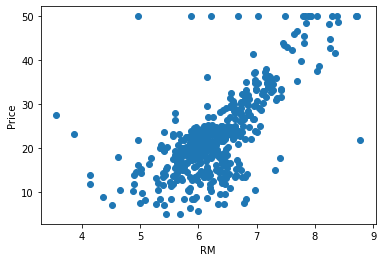

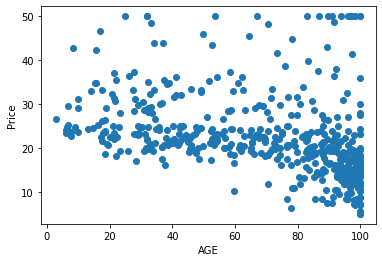

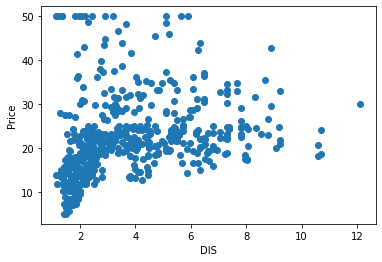

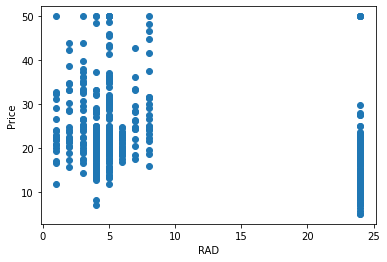

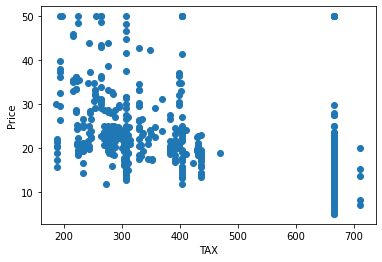

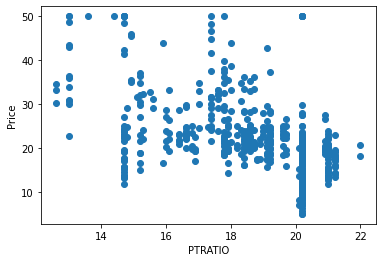

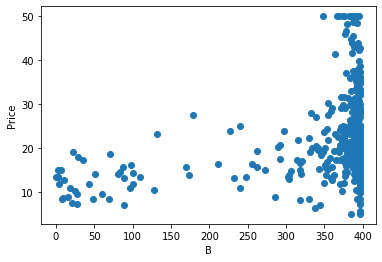

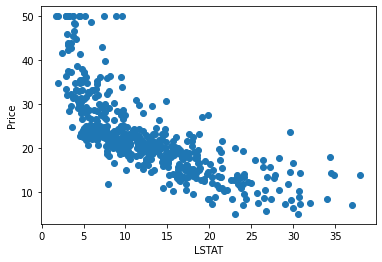

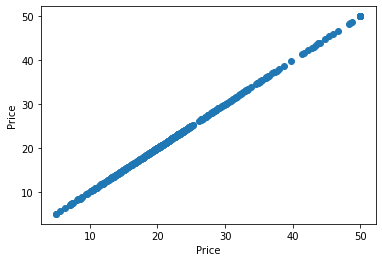

In [5]:
for col in data.columns:
  plt.scatter(data[col], data['Price'])
  plt.xlabel(col)
  plt.ylabel('Price')
  plt.show()

In [0]:
#split dataset into training set for model training and testing set for validation
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2)

# Features Scaling

Feature scaling is an important part of data pre-processing. Many machine learning algorithms are sensitive to the scale of the variables. 

If the features are not scaled, it makes the parameter values at which the cost function J(w) is equal form a very long elliptical shape. On the other hand, if the feature are scaled, the level curves are in circle, the gradient points directly towards the center.


![alt text](https://static.commonlounge.com/fp/600w/HUvkPMB4OlJqQU7LzAZXdWzgw1556694254_kc)

In [0]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#linear regression model (without regularizer)
LR = LinearRegression()
LR.fit(x_train, y_train)
LR_prediction = LR.predict(x_test)

MSE = mean_squared_error(y_test, LR_prediction)
r2 = r2_score(y_test, LR_prediction)

print('Mean Squared Error:{}, R2 Score:{}'.format(MSE, r2) )


Mean Squared Error:26.718669699276123, R2 Score:0.7140965530617978


# Regularizer

Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting. 

L1 Regularizer : Lasso
L2 Regularizer : Ridge

![alt text](https://miro.medium.com/max/2062/1*zsRlpoAYcuNy-LkobXSGoQ.png)

Regularizer can prevent overfitting when training model. 

![alt text](https://miro.medium.com/max/3506/1*7HMJl3f4R8a1OfeO7e_Zug.png)

![alt text](https://miro.medium.com/max/2636/1*9iTP4e-IlsMTKXhjUJ3-1w.png)

![alt text](https://miro.medium.com/max/2716/1*bhzCX_op3kPoGOrIB-sb2g.png)

In [10]:
#linear regression model with L1 regularizer
LRL1 = Lasso(alpha = 0.1, max_iter = 2000)
LRL1.fit(x_train, y_train)
LRL1_prediction = LRL1.predict(x_test)

MSE = mean_squared_error(y_test, LRL1_prediction)
r2 = r2_score(y_test, LRL1_prediction)

print('Mean Squared Error:{}, R2 Score:{}'.format(MSE, r2) )


Mean Squared Error:27.561911272688924, R2 Score:0.705073436448816


In [11]:
#linear regression model with L2 regularizer
LRL2 = Ridge(alpha = 0.05)
LRL2.fit(x_train, y_train)
LRL2_prediction = LRL2.predict(x_test)

MSE = mean_squared_error(y_test, LRL2_prediction)
r2 = r2_score(y_test, LRL2_prediction)

print('Mean Squared Error:{}, R2 Score:{}'.format(MSE, r2) )


Mean Squared Error:26.71997418647209, R2 Score:0.7140825943808451


# Cross Validation

Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models, it is also a re-sampling procedure used to evaluate a model if we have a limited data. 

![alt text](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [12]:
LRL1CV = LassoCV(alphas = [0.01, 0.03, 0.1, 0.3, 1.0], max_iter = 2000)

LRL1CV.fit(x_train, y_train)
LRL1CV_prediction = LRL1CV.predict(x_test)

MSE = mean_squared_error(y_test, LRL1CV_prediction)
r2 = r2_score(y_test, LRL1CV_prediction)

print('Mean Squared Error:{}, R2 Score:{}'.format(MSE, r2) )


Mean Squared Error:26.72776858054066, R2 Score:0.7139991903732323


In [13]:
LRL2CV = RidgeCV(alphas = (0.01, 0.03, 0.1, 0.3, 1.0))

LRL2CV.fit(x_train, y_train)
LRL2CV_prediction = LRL2CV.predict(x_test)

MSE = mean_squared_error(y_test, LRL2CV_prediction)
r2 = r2_score(y_test, LRL2CV_prediction)

print('Mean Squared Error:{}, R2 Score:{}'.format(MSE, r2) )

Mean Squared Error:26.746680888090197, R2 Score:0.7137968189985036
